In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])
import numpy as np

In [2]:
# Read in Revenue Files
file_2008 = "../../datasets/subsets/other_metrics/other_met_2008.csv"

other_2008 = pd.read_csv(file_2008)
other_2008 = other_2008.set_index(['STNAME'])
other_2008

,2008_E3A11,2008_E3A12,2008_E3A13,2008_E3A14,2008_E3A2,2008_E3A16,2008_E3A1,2008_E3B11,2008_E3B12,2008_E3B13,...,2008_X12D,2008_X12E,2008_X12F,2008_TX12,2008_NCE13,2008_ADA,2008_A14A,2008_A14B,2008_PPE15,2008_MEMBR
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,147426551,98887720,9511931,189278219,8535979,278629,445383050,NaN,NaN,NaN,...,23854965.0,2925621.0,NaN,510809932,6321629278,731161,NaN,731161.0,8646,742919
alaska,17002563,9000244,1014198,22867207,612479,45996,49930208,708982.0,302340.0,2578727.0,...,697303.0,1766626.0,11267.0,66061579,1852313265,119882,119882.0,NaN,15451,131029
arizona,111525944,33810949,57910330,166951224,20376945,2717353,372915800,42976255.0,NaN,NaN,...,NaN,3283448.0,143637.0,526597960,7876622654,973689,973689.0,NaN,8089,1087447
arkansas,80120995,23595119,5546385,119737415,1943105,185964,229185878,6383.0,1080.0,1764655.0,...,NaN,1101523.0,NaN,266141607,3890226381,439347,439347.0,NaN,8855,479016
california,753721570,290053755,72517520,1078387538,18196096,186393,2194866776,70434158.0,28920133.0,17028359.0,...,192710405.0,8315081.0,8442726.0,2427301947,59143253030,6365266,6365266.0,NaN,9292,6343471
colorado,75056950,21219391,13757990,116318897,5582556,1430156,227783384,22777602.0,5083958.0,7325287.0,...,952742.0,1485442.0,129278.0,479401069,6859365374,735549,735549.0,NaN,9326,801867
connecticut,67421303,32197561,17484908,89717227,3669286,1867722,208688721,43836531.0,10347737.0,10430071.0,...,23722968.0,494861.0,357475.0,233276387,8103512837,553445,NaN,553445.0,14642,570626
delaware,22691816,6250512,3090877,29219455,1463520,804036,62056696,NaN,NaN,NaN,...,14843066.0,269381.0,326210.0,53518145,1436076073,116472,NaN,116472.0,12330,122574
district of columbia,19461742,7129430,4909821,26992094,1039663,390270,58883357,NaN,NaN,NaN,...,4933666.0,282333.0,261127.0,54865774,1227571029,61636,61636.0,NaN,19916,78422


In [3]:
(other_2008.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california      82.037938
texas           56.509958
new york        56.473896
florida         35.154841
pennsylvania    30.051148
dtype: float64

In [4]:
summary_2008 = pd.DataFrame(other_2008.sum(axis=1)/100000000, columns=['Total OtherEx ($100M)'])
summary_2008['NoninstructionalEx ($100M)'] = other_2008.iloc[:,0:14].sum(axis=1)/100000000
summary_2008['CurrentEx ($100M)'] = other_2008.iloc[:,14:15].sum(axis=1)/100000000
summary_2008['Per PupilEx ($)'] = other_2008.iloc[:,44:45].sum(axis=1)


summary_2008

,Total OtherEx ($100M),NoninstructionalEx ($100M),CurrentEx ($100M),Per PupilEx ($)
STNAME,,,,
alabama,90.592351,8.993021,0.0,8646
alaska,24.611960,1.165584,0.0,15451
arizona,116.015205,8.545473,0.0,8089
arkansas,54.130715,4.690146,0.0,8855
california,820.379381,46.646423,0.0,9292
colorado,103.487776,5.405385,0.0,9326
connecticut,104.541418,5.660831,0.0,14642
delaware,20.145732,1.255769,0.0,12330
district of columbia,17.248842,1.188064,0.0,19916


In [5]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2008.csv"

success_2008 = pd.read_csv(dropout_path)
success_2008

,STNAME,2008_DRP912,2008_DRP9,2008_DRP10,2008_DRP11,2008_DRP12,2008_DRPAM,2008_DRPAS,2008_DRPHI,2008_DRPBL,2008_DRPWH
0,alabama,2.199999,1.900000,2.400000,2.500000,1.799999,1.799999,1.099999,2.199999,2.199999,2.099998
1,alaska,7.299999,4.299999,5.799999,9.000000,10.399994,12.199997,6.899998,7.500000,9.599998,5.099998
2,arizona,6.699997,4.199997,5.099998,6.799999,10.799995,11.399994,3.799999,7.299999,7.099998,5.599998
3,arkansas,4.699997,2.799999,4.199997,5.699997,6.299999,4.899998,2.799999,5.099998,6.699997,4.000000
4,california,5.000000,2.500000,3.000000,4.099998,11.000000,6.599998,2.299999,6.000000,9.000000,3.099998
5,colorado,6.399998,3.900000,4.799999,7.199997,10.199997,11.299995,3.799999,12.099998,10.599998,3.900000
6,connecticut,2.799999,2.599998,2.900000,3.099998,2.699999,2.500000,1.500000,6.099998,5.599998,1.599999
7,delaware,6.000000,6.299999,6.399998,5.199997,6.199997,9.399994,NaN,8.199997,7.699997,4.899998
8,district of columbia,5.500000,5.699997,5.899998,5.199997,4.699997,NaN,NaN,NaN,NaN,NaN
9,florida,3.299999,2.799999,3.000000,3.099998,3.599998,2.500000,1.099999,3.699999,4.699997,2.099998


In [6]:
summary_2008['Dropout Rate'] = ''

for i in range(len(success_2008)):
    summary_2008['Dropout Rate'][i] = success_2008['2008_DRP912'][i].astype(float)
    
summary_2008

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Total OtherEx ($100M),NoninstructionalEx ($100M),CurrentEx ($100M),Per PupilEx ($),Dropout Rate
STNAME,,,,,
alabama,90.592351,8.993021,0.0,8646,2.2
alaska,24.611960,1.165584,0.0,15451,7.3
arizona,116.015205,8.545473,0.0,8089,6.7
arkansas,54.130715,4.690146,0.0,8855,4.7
california,820.379381,46.646423,0.0,9292,5
colorado,103.487776,5.405385,0.0,9326,6.4
connecticut,104.541418,5.660831,0.0,14642,2.8
delaware,20.145732,1.255769,0.0,12330,6
district of columbia,17.248842,1.188064,0.0,19916,5.5


In [7]:
summary_2008['Dropout Rate'] = ''

for i in range(len(success_2008)):
    summary_2008['Dropout Rate'][i] = success_2008['2008_DRP912'][i].astype(float)
    

summary_2008 = summary_2008[summary_2008['Dropout Rate'].notna()]
summary_2008['Dropout Rate'] = summary_2008['Dropout Rate'].astype(float)
summary_2008.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, alabama to wyoming
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total OtherEx ($100M)       50 non-null     float64
 1   NoninstructionalEx ($100M)  50 non-null     float64
 2   CurrentEx ($100M)           50 non-null     float64
 3   Per PupilEx ($)             50 non-null     int64  
 4   Dropout Rate                50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.3+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


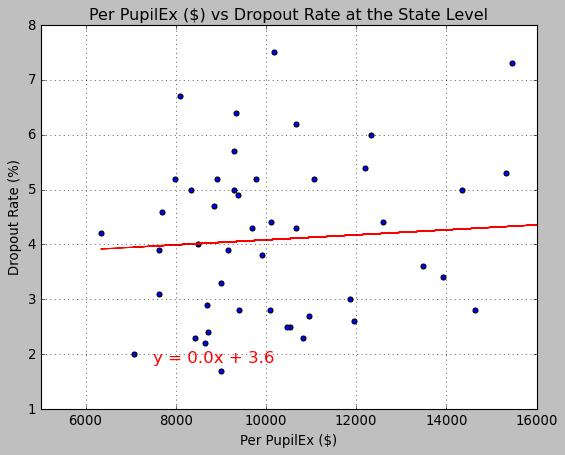

The correlation between both factors is 0.0898


In [8]:
# Total Support vs Dropout Rate
x_values = summary_2008['Per PupilEx ($)']
y_values = summary_2008['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7500,1.85),fontsize=15,color="red")
plt.xlabel('Per PupilEx ($)')
plt.ylabel('Dropout Rate (%)')
plt.title('Per PupilEx ($) vs Dropout Rate at the State Level')
plt.xlim(left = 5000, right = 16000)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

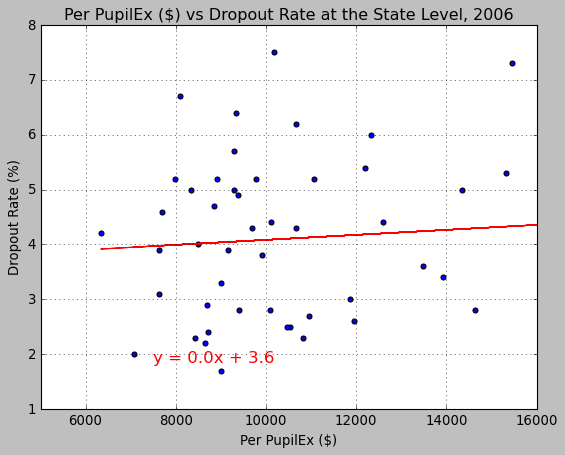

The correlation between both factors is 0.0898


In [9]:
# Total Support vs Dropout Rate
x_values = summary_2008['Per PupilEx ($)']
y_values = summary_2008['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7500,1.85),fontsize=15,color="red")
plt.xlabel('Per PupilEx ($)')
plt.ylabel('Dropout Rate (%)')
plt.title('Per PupilEx ($) vs Dropout Rate at the State Level, 2006')
plt.xlim(left = 5000, right = 16000)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")